# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # para visualização de informações
import seaborn as sns

In [2]:
import spacy
from spacy.lang.el.examples import sentences 

## K fold

In [3]:
from kfold import k_folds, train_values, test_values

## Models

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
from sklearn.pipeline import Pipeline

## Preprocessing

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from wordcloud import WordCloud
from unidecode import unidecode

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pizzaisamor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Metrics

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

## Text to list

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Reading and visualizing data

In [10]:
#Lembre de fazer upload dele nos arquivos do colab
PATH = "./data/iliad_sentiments.csv"

In [11]:
df = pd.read_csv(PATH)  
df

,greek text,english text,neutral,positive,negative,narrator,y,class
0,"Τη μάνητα, θεά, τραγούδα μας του ξακουστού Αχι...",Apollo’s priest to th’ Argive fleet doth bring,0.375,0.500,0.125,0.0,"[0.375, 0.5, 0.125, 0.0]",positive
1,"ανάθεμα τη, πίκρες που 'δωκε στους Αχαιούς περ...","Gifts for his daughter, pris’ner to the king;",0.125,0.250,0.625,0.0,"[0.125, 0.25, 0.625, 0.0]",negative
2,και πλήθος αντρειωμένες έστειλε ψυχές στον Άδη...,For which her tender’d freedom he entreats;,0.000,0.125,0.875,0.0,"[0.0, 0.125, 0.875, 0.0]",negative
3,"παλικαριών, στους σκύλους ρίχνοντας να φάνε τα...","But, being dismiss’d with contumelious threats,",0.000,0.125,0.875,0.0,"[0.0, 0.125, 0.875, 0.0]",negative
4,και στα όρνια ολούθε —έτσι το θέλησε να γίνει ...,"At Phœbus’ hands, by vengeful pray’r, he seeks",0.500,0.125,0.375,0.0,"[0.5, 0.125, 0.375, 0.0]",neutral
...,...,...,...,...,...,...,...,...
606,κει που 'χε χτίσει στον καθένα τους παλάτι ο κ...,"Address’d for sleep, where ev’ry one, with art...",0.375,0.625,0.000,0.0,"[0.375, 0.625, 0.0, 0.0]",positive
607,"ο ξακουστός τεχνίτης Ήφαιστος, με τη σοφή του ...",By heav’n’s great both-foot-halting God a sev’...,0.250,0.750,0.000,0.0,"[0.25, 0.75, 0.0, 0.0]",positive
608,"Κι ο Δίας ο Ολύμπιος, ό αστραπόχαρος, στην κλί...","Ev’n he to sleep went, by whose hand heav’n is...",0.250,0.750,0.000,0.0,"[0.25, 0.75, 0.0, 0.0]",positive
609,"εκεί που ως τώρα πάντα, ως του 'ρχονταν ύπνος ...","High Jove, where he had us’d to rest when swee...",0.125,0.875,0.000,0.0,"[0.125, 0.875, 0.0, 0.0]",positive


## Wordcloud 

In [12]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30)) # Set figure size
    plt.imshow(wordcloud)        # Display image
    plt.axis("off")              # No axis details

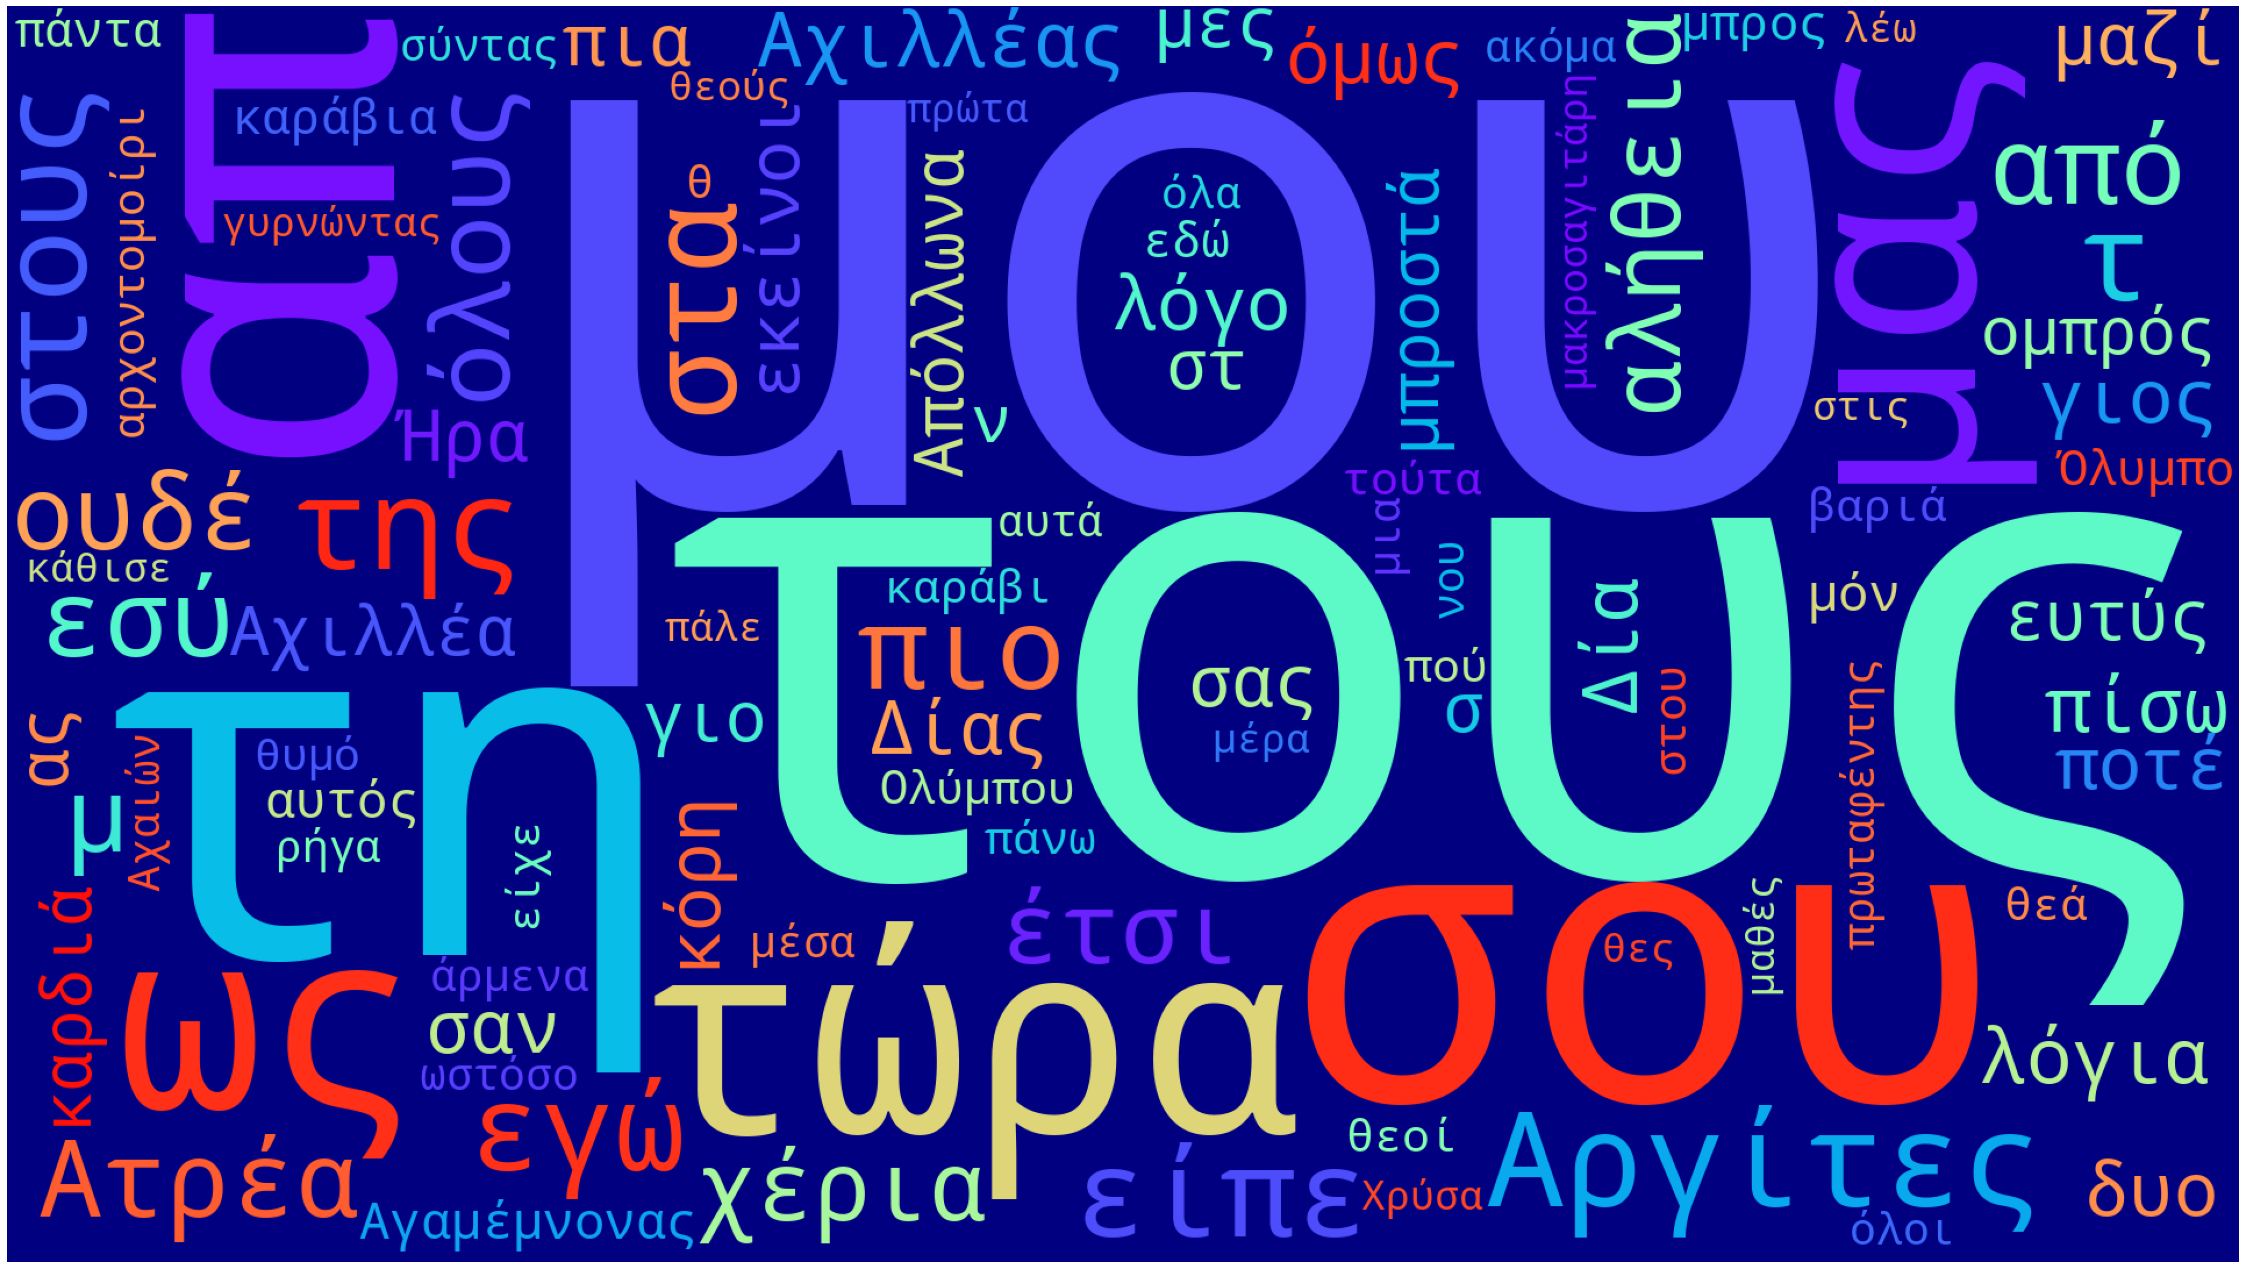

In [13]:
stop_words = stopwords.words('greek')

all_words = ''
for line in df['greek text']:
    for word in line.split():
        all_words = all_words + ' ' + word

wordcloud = WordCloud(
    random_state=1,
    background_color='navy',
    colormap='rainbow',
    collocations=False,
    stopwords=stop_words,
    width=1920,
    height=1080,
    max_words=100
).generate(all_words)

plot_cloud(wordcloud)

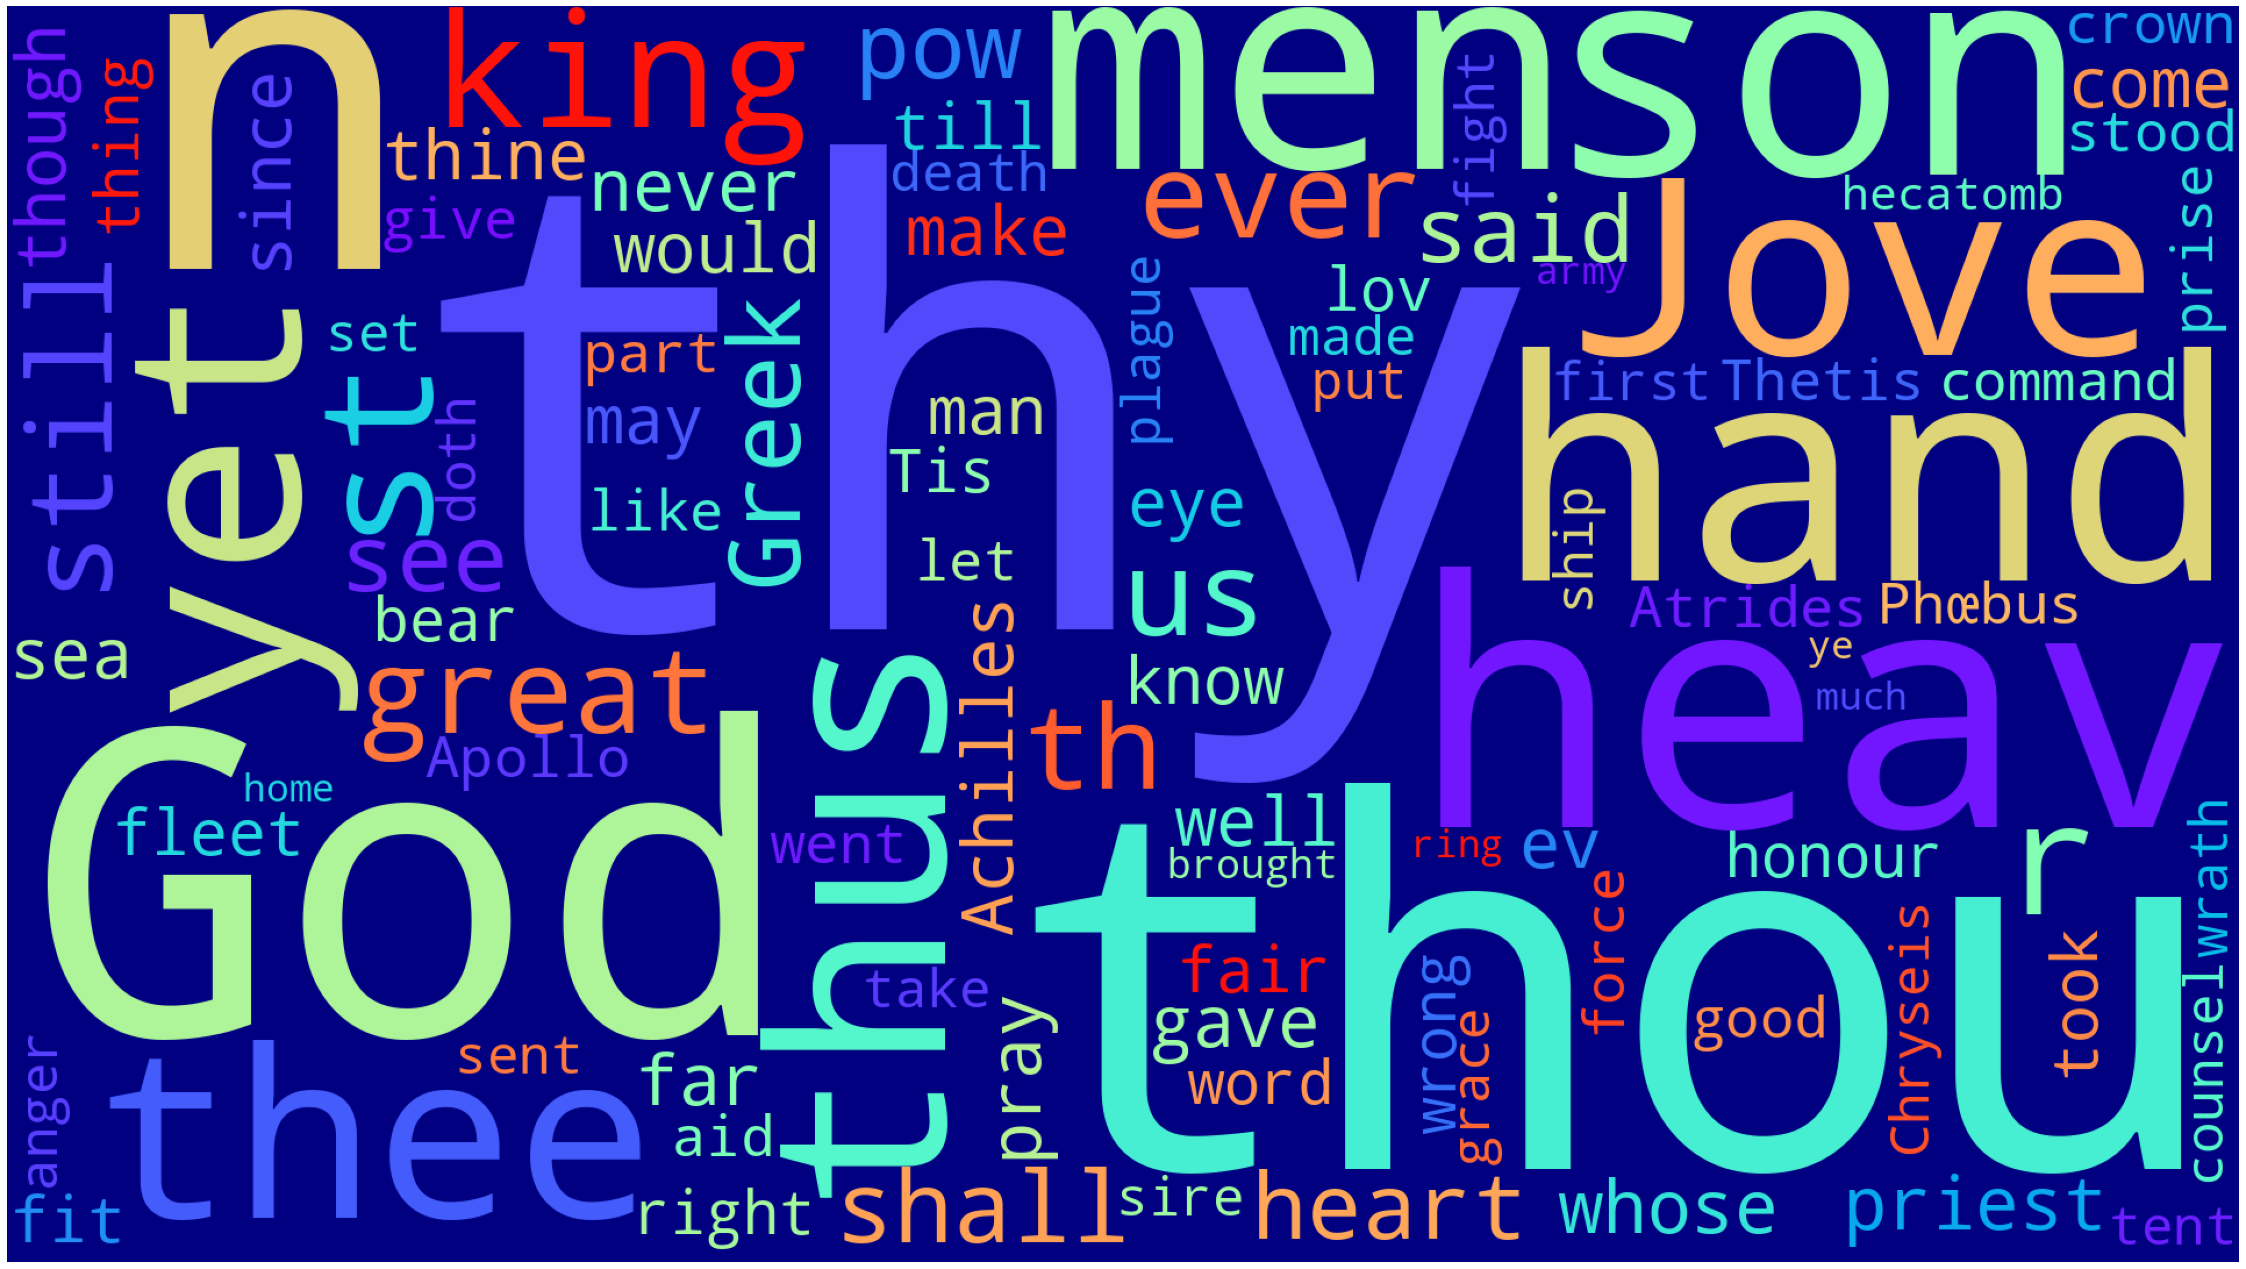

In [14]:
stop_words = stopwords.words('english')

all_words = ''
for line in df['english text']:
    for word in line.split():
        all_words = all_words + ' ' + word

wordcloud = WordCloud(
    random_state=1,
    background_color='navy',
    colormap='rainbow',
    collocations=False,
    stopwords=stop_words,
    width=1920,
    height=1080,
    max_words=100
).generate(all_words)

plot_cloud(wordcloud)

## Distribution

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   greek text    611 non-null    object 
 1   english text  611 non-null    object 
 2   neutral       611 non-null    float64
 3   positive      611 non-null    float64
 4   negative      611 non-null    float64
 5   narrator      611 non-null    float64
 6   y             611 non-null    object 
 7   class         611 non-null    object 
dtypes: float64(4), object(4)
memory usage: 38.3+ KB


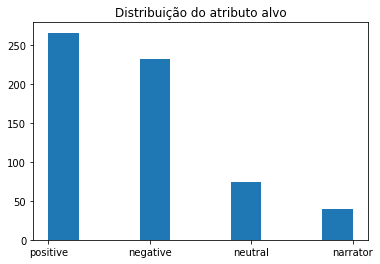

In [16]:
## Distribuição do atributo alvo
plt.hist(df['class'])
plt.title("Distribuição do atributo alvo")
plt.show()

## Ambiguous values

In [17]:
def count_values(nro_instances, df_inverse):
    counter = [df_inverse[i].value_counts() for i in range(0, nro_instances)] 

    return counter

def count_ambiguous(counter):
    nro_ambiguous = 0
    ambiguos_list = []
    
    for idx, count in enumerate(counter):
        indexes = count.index
        max_index = indexes.max()

        if count.at[max_index] > 1:
            nro_ambiguous += 1
            ambiguos_list.append(idx)

    return nro_ambiguous, ambiguos_list

def get_ambiguous(df):
    
    df_inverse = df.T
    df_inverse = df_inverse.drop(["greek text", "english text", "class", "y"])
    
    counter = count_values(len(df), df_inverse)
    
    nro_ambiguous, ambiguos_list = count_ambiguous(counter)
    
    return nro_ambiguous, ambiguos_list

In [18]:
nro_ambiguous, ambiguos_list = get_ambiguous(df)

In [19]:
nro_ambiguous

69

## Number of tokens

In [20]:
df_tokens = df.copy()
df_tokens['token_count'] = df["greek text"].str.replace(',','').str.split().str.len()
df_tokens.filter(['greek text','token_count'])

,greek text,token_count
0,"Τη μάνητα, θεά, τραγούδα μας του ξακουστού Αχι...",8
1,"ανάθεμα τη, πίκρες που 'δωκε στους Αχαιούς περ...",8
2,και πλήθος αντρειωμένες έστειλε ψυχές στον Άδη...,8
3,"παλικαριών, στους σκύλους ρίχνοντας να φάνε τα...",9
4,και στα όρνια ολούθε —έτσι το θέλησε να γίνει ...,12
...,...,...
606,κει που 'χε χτίσει στον καθένα τους παλάτι ο κ...,10
607,"ο ξακουστός τεχνίτης Ήφαιστος, με τη σοφή του ...",9
608,"Κι ο Δίας ο Ολύμπιος, ό αστραπόχαρος, στην κλί...",11
609,"εκεί που ως τώρα πάντα, ως του 'ρχονταν ύπνος ...",11


/tmp/ipykernel_59513/3560189687.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tokens.token_count)


<Axes: xlabel='token_count', ylabel='Density'>

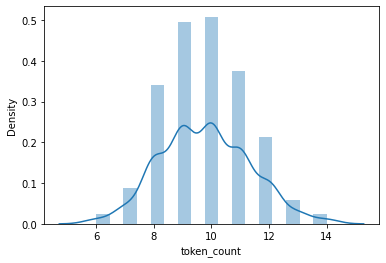

In [21]:
sns.distplot(df_tokens.token_count)

## Class and verses

In [22]:
df.index.name = "verse"

In [23]:
df = df.reset_index()

In [24]:
class_to_color_id = pd.factorize(df["class"])[0]

<Axes: xlabel='verse', ylabel='class'>

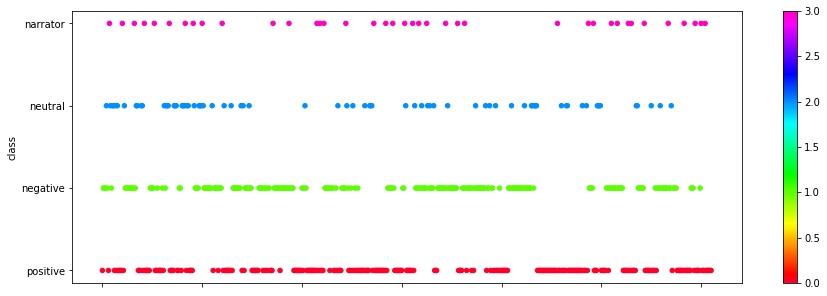

In [25]:
df.plot.scatter(x="verse", y='class', c=class_to_color_id, colormap="gist_rainbow", figsize=(15, 5))

# Pre processing

In [26]:
import numpy as np

In [27]:
# Adding new column for processing text
df_pp = df.copy()
df_unidecode = df.copy()

df_pp.head()

,verse,greek text,english text,neutral,positive,negative,narrator,y,class
0,0,"Τη μάνητα, θεά, τραγούδα μας του ξακουστού Αχι...",Apollo’s priest to th’ Argive fleet doth bring,0.375,0.500,0.125,0.0,"[0.375, 0.5, 0.125, 0.0]",positive
1,1,"ανάθεμα τη, πίκρες που 'δωκε στους Αχαιούς περ...","Gifts for his daughter, pris’ner to the king;",0.125,0.250,0.625,0.0,"[0.125, 0.25, 0.625, 0.0]",negative
2,2,και πλήθος αντρειωμένες έστειλε ψυχές στον Άδη...,For which her tender’d freedom he entreats;,0.000,0.125,0.875,0.0,"[0.0, 0.125, 0.875, 0.0]",negative
3,3,"παλικαριών, στους σκύλους ρίχνοντας να φάνε τα...","But, being dismiss’d with contumelious threats,",0.000,0.125,0.875,0.0,"[0.0, 0.125, 0.875, 0.0]",negative
4,4,και στα όρνια ολούθε —έτσι το θέλησε να γίνει ...,"At Phœbus’ hands, by vengeful pray’r, he seeks",0.500,0.125,0.375,0.0,"[0.5, 0.125, 0.375, 0.0]",neutral


In [28]:
stop_words = stopwords.words('greek')

def remove_stop_words(text):
    new_text = ''
    for word in text.split():
        if word not in stop_words:
            new_text += word + ' '
    return new_text.strip()

In [29]:
import re

def remove_numbers(text):
    new_text = ''
    for word in text.split():
        if re.search('[0-9]+', word) == None:
            new_text += word + ' '
    return new_text.strip()

In [30]:
import string

PUNCT_TO_REMOVE = string.punctuation + '᾿«»—'
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
PUNCT_TO_REMOVE

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~᾿«»—'

In [31]:
import unicodedata

def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

In [32]:
# Removing Accented Characters\n",
df_pp['greek text'] = df_pp['greek text'].apply(lambda x: strip_accents(x))

# Expanding Contractions

# Removing Special Characters

# Removing Numbers
df_pp['greek text'] = df_pp['greek text'].apply(lambda x: remove_numbers(x))

# Removing Punctuation
df_pp['greek text'] = df_pp['greek text'].apply(lambda x: remove_punctuation(x))
    
# Lowercase
df_pp['greek text'] = df_pp['greek text'].apply(lambda x: x.lower())
    
# Lemmatization

# Removing Stopwords
stop_words = stopwords.words('greek')
df_pp['greek text'] = df_pp['greek text'].apply(lambda x: remove_stop_words(x))

# Removal of Frequent words

# Removal of Rare words

# Removing extra whitespaces and tabs
df_pp['greek text'] = df_pp['greek text'].apply(lambda x: x.strip())

# Unidecode
df_unidecode['greek text'] = df_pp['greek text'].apply(lambda x: unidecode(x))

df_pp.head()
# df_unidecode.head()

,verse,greek text,english text,neutral,positive,negative,narrator,y,class
0,0,τη μανητα θεα τραγουδα μας ξακουστου αχιλλεα,Apollo’s priest to th’ Argive fleet doth bring,0.375,0.500,0.125,0.0,"[0.375, 0.5, 0.125, 0.0]",positive
1,1,αναθεμα τη πικρες δωκε στους αχαιους περισσιες,"Gifts for his daughter, pris’ner to the king;",0.125,0.250,0.625,0.0,"[0.125, 0.25, 0.625, 0.0]",negative
2,2,πληθος αντρειωμενες εστειλε ψυχες αδη κατω,For which her tender’d freedom he entreats;,0.000,0.125,0.875,0.0,"[0.0, 0.125, 0.875, 0.0]",negative
3,3,παλικαριων στους σκυλους ριχνοντας φανε κορμια...,"But, being dismiss’d with contumelious threats,",0.000,0.125,0.875,0.0,"[0.0, 0.125, 0.875, 0.0]",negative
4,4,στα ορνια ολουθε ετσι θελησε γινει διας,"At Phœbus’ hands, by vengeful pray’r, he seeks",0.500,0.125,0.375,0.0,"[0.5, 0.125, 0.375, 0.0]",neutral


In [33]:
from collections import Counter

count = Counter()
for text in df_pp["greek text"].values:
    for word in text.split():
        count[word] += 1

count.most_common()

[('μου', 96),
 ('τους', 85),
 ('τη', 59),
 ('σου', 53),
 ('απ', 50),
 ('τωρα', 38),
 ('μας', 33),
 ('ως', 32),
 ('αργιτες', 29),
 ('της', 26),
 ('ειπε', 25),
 ('στα', 24),
 ('στους', 23),
 ('εγω', 23),
 ('τ', 22),
 ('πιο', 21),
 ('εσυ', 19),
 ('ατρεα', 18),
 ('ολους', 18),
 ('ετσι', 17),
 ('ουδε', 17),
 ('μ', 17),
 ('αχιλλεας', 15),
 ('πισω', 15),
 ('μον', 15),
 ('χερια', 15),
 ('αληθεια', 15),
 ('δια', 14),
 ('ομως', 14),
 ('λογο', 14),
 ('λογια', 14),
 ('δυο', 13),
 ('γιος', 13),
 ('κορη', 13),
 ('σαν', 13),
 ('διας', 12),
 ('σας', 12),
 ('πια', 12),
 ('ηρα', 12),
 ('μαζι', 12),
 ('αχιλλεα', 11),
 ('στ', 11),
 ('απολλωνα', 11),
 ('ευτυς', 11),
 ('γιο', 11),
 ('μπροστα', 11),
 ('καρδια', 11),
 ('ας', 11),
 ('μες', 11),
 ('σ', 10),
 ('ν', 10),
 ('ομπρος', 10),
 ('αγαμεμνονας', 10),
 ('αυτος', 10),
 ('καραβια', 9),
 ('μπρος', 9),
 ('ολυμπο', 9),
 ('εδω', 9),
 ('μητε', 9),
 ('παντα', 9),
 ('θεα', 8),
 ('ειχε', 8),
 ('θεοι', 8),
 ('βαρια', 8),
 ('ολυμπου', 8),
 ('πανω', 8),
 ('ολα', 8),
 

**Lemmatization**

In [34]:
!python -m spacy download el_core_news_md

/bin/bash: python: comando não encontrado


In [35]:
def lemmatize_sentence(sentence):
    lemma_list = []
    
    nlp = spacy.load("el_core_news_md")
    doc = nlp(sentence)
    
    lemma_list= [token.lemma_ for token in doc if token.pos_ != "PUNCT"] 
    
    return " ".join(lemma_list)

**X & Y list**

In [36]:
X_temp = df["greek text"].tolist()

In [37]:
ohe = OneHotEncoder()
y_temp = ohe.fit_transform(df[['class']])

ohe.categories_

[array(['narrator', 'negative', 'neutral', 'positive'], dtype=object)]

In [38]:
# X = [lemmatize_sentence(x) for x in X_temp]
X = [x for x in X_temp]
y = y_temp.toarray()

In [39]:
y = y_temp.toarray()

# Stratification

AttributeError: 'DataFrame' object has no attribute 'sentiment'

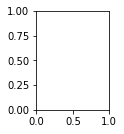

In [61]:
from stratification import stratification
k = 4
s = stratification(y,k)

def plot_fold(fold_idx_list, fold_number):
    
    df_f = df.copy()
    all_idx = np.arange(len(df))
        
    for idx in all_idx:
        if not(idx in fold_idx_list):
            df_f = df_f.drop(idx)


    title_plot = "Class distribution fold {}".format(fold_number)

    df_f.sentiment.value_counts().plot(kind = 'bar',title=title_plot)


for i in range(k):
    plt.subplot(2,k,i+1)
    plot_fold(s[i],i)
    plt.subplots_adjust(left=0.5,
                    bottom=0.5,
                    right=1.9,
                    top=1.9,
                    wspace=0.9,
                    hspace=0.9)


# TF-IDF

**Spliting k folds**

In [63]:
folds = k_folds(X=X, y=y, k=4, shuffle=True)

## Naive Bayes

In [41]:
accuracy_list = []
recall_list = []
precision_list = []

#Cross validation
for (train_fold, test_fold) in folds:
    #Train and test
    X_train, y_train =  train_values(X, y, train_fold)
    X_test, y_test =  test_values(X, y, test_fold)
    
    #Naive Bayes
    text_nb = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB()),
        ])

    text_nb.fit(X_train, y_train)
    predicted = text_nb.predict(X_test)

    accuracy = accuracy_score(y_test, predicted, normalize=False)
    recall = recall_score(y_test, predicted, average='macro') * 100
    precision = precision_score(y_test, predicted, average='macro') * 100
    
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    
nb_metrics = {}
    
nb_metrics["accuracy"] = np.average(accuracy_list) #np.std(accuracy_list)
nb_metrics["recall"] = np.average(recall_list)
nb_metrics["precision"] = np.average(precision_list)

print(nb_metrics)

ValueError: y should be a 1d array, got an array of shape (457, 4) instead.

## Decision Tree

In [ ]:
accuracy_list = []
recall_list = []
precision_list = []

#Cross validation
for (train_fold, test_fold) in folds:
    #Train and test
    X_train, y_train =  train_values(X, y, train_fold)
    X_test, y_test =  test_values(X, y, test_fold)
    
    text_tree = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier(max_depth=5,class_weight='balanced',random_state=42)),
    ])

    text_tree.fit(X_train, y_train)
    predicted = text_tree.predict(X_test)

    accuracy = accuracy_score(y_test, predicted, normalize=False)
    recall = recall_score(y_test, predicted, average='macro') * 100
    precision = precision_score(y_test, predicted, average='macro') * 100
    
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)

dt_metrics = {}
    
dt_metrics["accuracy"] = np.average(accuracy_list)
dt_metrics["recall"] = np.average(recall_list)
dt_metrics["precision"] = np.average(precision_list)

print(dt_metrics)

## KNN

In [ ]:
accuracy_list = []
recall_list = []
precision_list = []

#Cross validation
for (train_fold, test_fold) in folds:
    #Train and test
    X_train, y_train =  train_values(X, y, train_fold)
    X_test, y_test =  test_values(X, y, test_fold)
    
    text_knn = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', KNeighborsClassifier(n_neighbors=5)),
    ])

    text_knn.fit(X_train, y_train)
    predicted = text_knn.predict(X_test)

    accuracy = accuracy_score(y_test, predicted, normalize=False)
    recall = recall_score(y_test, predicted, average='macro') * 100
    precision = precision_score(y_test, predicted, average='macro') * 100
    
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)

knn_metrics = {}
    
knn_metrics["accuracy"] = np.average(accuracy_list)
knn_metrics["recall"] = np.average(recall_list)
knn_metrics["precision"] = np.average(precision_list)

print(knn_metrics)

# SBERT

In [ ]:
#!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('lighteternal/stsb-xlm-r-greek-transfer')

In [ ]:
X_train_sbert = model.encode(X_train)
X_test_sbert = model.encode(X_test)

## Decision Tree

In [ ]:
accuracy_list = []
recall_list = []
precision_list = []

#Cross validation
for (train_fold, test_fold) in folds:
    #Train and test
    X_train, y_train =  train_values(X, y, train_fold)
    X_test, y_test =  test_values(X, y, test_fold)
    
    X_train_sbert = model.encode(X_train)
    X_test_sbert = model.encode(X_test)
    
    text_dt = DecisionTreeClassifier(max_depth=5,class_weight='balanced',random_state=42)
    text_dt.fit(X_train_sbert, y_train)
    predicted = text_dt.predict(X_test_sbert)

    accuracy = accuracy_score(y_test, predicted, normalize=False)
    recall = recall_score(y_test, predicted, average='macro') * 100
    precision = precision_score(y_test, predicted, average='macro') * 100
    
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    
dt_metrics = {}
    
dt_metrics["accuracy"] = np.average(accuracy_list)
dt_metrics["recall"] = np.average(recall_list)
dt_metrics["precision"] = np.average(precision_list)

print(dt_metrics)

# CÓDIGOS DE EXEMPLO

### Functions to greek text

Não está funcionando

In [ ]:
!pip install cltk

In [ ]:
from cltk.stem.lemma import LemmaReplacer
#from cltk.corpus.utils.formatter import cltk_normalize

In [ ]:
from cltk.stem.lemma import LemmaReplacer
sentence = 'λόγων λογίων'
lemmatizer = LemmaReplacer('greek')
lemmatizer.lemmatize(sentence, return_raw=True)

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

**Bag of Words**

In [ ]:
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.fit_transform(X_test)
X_train_counts.shape

**TF-IDF**

In [ ]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)
X_train_tfidf.shape

In [ ]:
def get_bow(X_train, X_test):
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(X_train)
    X_test_counts = count_vect.fit_transform(X_test)
    
    return X_train_counts, X_test_counts

In [ ]:
def get_tfidf(X_train, X_test):
    X_train_counts, X_test_counts = get_bow(X_train, X_test)
    
    tfidf_transformer = TfidfTransformer()
    
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)
    
    return X_train_tfidf, X_test_tfidf

### Testar com lematização e stemming

Sugestões que encontrei:
- https://legacy.cltk.org/en/latest/greek.html#lemmatization
- https://github.com/kpech21/Greek-Stemmer

# UMAP

Diminuir a dimensionalidade do SBERT

In [ ]:
!pip install umap-learn

In [ ]:
import umap

In [ ]:
X_umap_train = umap.UMAP().fit_transform(X_train_sbert)
X_umap_test = umap.UMAP().fit_transform(X_test_sbert)

# Naive Bayes

In [ ]:
#TF-IDF

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== TF-IDF ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

In [ ]:
#SBERT

text_clf = MultinomialNB()
text_clf.fit(X_train_sbert, y_train)
predicted = text_clf.predict(X_test_sbert)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== SBERT ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

In [ ]:
#SBERT > UMAP

text_clf = MultinomialNB()
text_clf.fit(X_umap_train, y_train)
predicted = text_clf.predict(X_umap_test)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== SBERT > UMAP ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#TF-IDF

text_tree = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier(max_depth=5,class_weight='balanced',random_state=42)),
])

text_tree.fit(X_train, y_train)
predicted = text_tree.predict(X_test)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== TF-IDF ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

In [ ]:
#SBERT

text_tree = DecisionTreeClassifier(max_depth=5,class_weight='balanced',random_state=42)
text_tree.fit(X_train_sbert, y_train)
predicted = text_tree.predict(X_test_sbert)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== SBERT ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

In [ ]:
#SBERT > UMAP

text_tree = DecisionTreeClassifier(max_depth=5,class_weight='balanced',random_state=42)
text_tree.fit(X_umap_train, y_train)
predicted = text_tree.predict(X_umap_test)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== SBERT > UMAP ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
text_knn = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(n_neighbors=5)),
])

text_knn.fit(X_train, y_train)
predicted = text_knn.predict(X_test)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== TF-IDF ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

Normalizar e diminuir a dimensionalidade

In [ ]:
#SBERT

text_knn = KNeighborsClassifier(n_neighbors=5)
text_knn.fit(X_train_sbert, y_train)
predicted = text_knn.predict(X_test_sbert)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== SBERT ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

In [ ]:
#SBERT > UMAP

text_knn = KNeighborsClassifier(n_neighbors=5)
text_knn.fit(X_umap_train, y_train)
predicted = text_knn.predict(X_umap_test)

accuracy = accuracy_score(y_test, predicted, normalize=False)
recall = recall_score(y_test, predicted, average='macro') * 100
precision = precision_score(y_test, predicted, average='macro') * 100

print("==== SBERT > UMAP ====")
print(f"Accuracy: {accuracy}%")
print(f"Recall: {recall}%")
print(f"Precision: {precision}%")

# Confusion Matrix

In [111]:
def confusion_matrix(y_true, y_pred):
    # Build matrix
    matrix = [[]] * len(y_true[0])
    for i in range(len(y_true[0])):
        matrix[i] = [0] * (len(y_true[0]) + 1)

    # Calculate matirx
    for i in range(len(y_true)):
        tr = y_true[i] 
        pred = y_pred[i]
        j = np.where(tr == 1)[0][0]
        k = np.where(pred == 1)[0]        
        k = len(y_true[0]) if len(k) == 0 else k[0]
        matrix[j][k] += 1

    return matrix

In [112]:
def square_matrix(confusion_matrix):
    copy = [[] for _ in range(len(confusion_matrix))]
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix[i]) - 1):
            copy[i].append(confusion_matrix[i][j])
    return copy

In [113]:
def plot_confusion_matrix(confusion_matrix, categories):
    copy = square_matrix(cm_test)
    df_cm = pd.DataFrame(copy, index = [i for i in categories], columns = [i for i in categories])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True)

[[2, 0, 1, 1, 0], [0, 1, 1, 0, 0], [0, 0, 3, 0, 0], [0, 0, 0, 2, 0]]


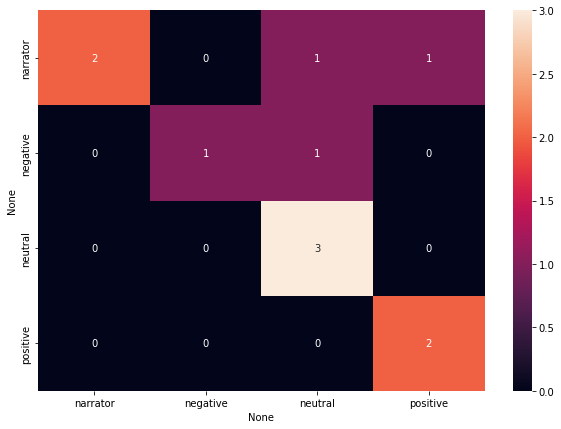

In [114]:
# Exemplo de uso
truest_y = [ [1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1], [0,1,0,0], [1,0,0,0], [0,0,1,0], [0,0,0,1], [1,0,0,0], [1,0,0,0], [0,0,1,0]]
fake_y = [ [1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1], [0,0,1,0], [0,0,1,0], [0,0,1,0], [0,0,0,1], [1,0,0,0], [0,0,0,1], [0,0,1,0]]

truest_y = np.array([np.array(xi) for xi in truest_y])
fake_y = np.array([np.array(xi) for xi in fake_y])

cm_test = confusion_matrix(truest_y, fake_y)
print(cm_test)

plot_confusion_matrix(cm_test, ohe.categories_)

# Metrics

In [48]:
def list_mean(lst):
    mean = 0
    for i in range(len(lst)):
        mean += lst[i]
    
    mean /= len(lst)
    
    return mean

In [49]:
def accuracy(confusion_matrix):
    total = 0
    true_values = 0
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix[i])):
            total += confusion_matrix[i][j]
            if i == j:
                true_values += confusion_matrix[i][j]

    accuracy = true_values / total
    
    return accuracy

In [50]:
def error_rate(confusion_matrix):
    err = 1 - accuracy(confusion_matrix)
    
    return err

In [104]:
def individual_precision_list(confusion_matrix):
    cols = [0] * len(confusion_matrix)
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix)):
            cols[j] += confusion_matrix[i][j]
    
    individual_precision = [0] * len(confusion_matrix)
    for i in range(len(confusion_matrix)):
        if cols[i] > 0:
            individual_precision[i] = confusion_matrix[i][i] / cols[i]
        
    return individual_precision

In [84]:
def macro_precision(confusion_matrix):
    precision = list_mean(individual_precision_list(confusion_matrix))
    
    return precision

In [53]:
def individual_recall_list(confusion_matrix):
    lines = [0] * len(confusion_matrix)
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix[i])):
            lines[i] += confusion_matrix[i][j]

    individual_recall = [0] * len(confusion_matrix)
    for i in range(len(confusion_matrix)):
        individual_recall[i] = confusion_matrix[i][i] / lines[i]    
    
    return individual_recall

In [54]:
def macro_recall(confusion_matrix):
    recall = list_mean(individual_recall_list(confusion_matrix))
    
    return recall

In [55]:
def individual_specificity_list(confusion_matrix):
    total = 0
    cols = [0] * len(confusion_matrix)
    vn = [0] * len(confusion_matrix)
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix[i])):
            total += confusion_matrix[i][j]
            cols[j] += confusion_matrix[i][j]
            vn[i] -= confusion_matrix[i][j]
            vn[j] -= confusion_matrix[i][j]
            if i == j:
                vn[i] += confusion_matrix[i][j]
                
    for i in range(len(vn)):
        vn[i] += total

    individual_specificity = [0] * len(confusion_matrix)
    for i in range(len(confusion_matrix)):
        individual_specificity[i] = vn[i] / (cols[i] - confusion_matrix[i][i] + vn[i])
    
    return individual_specificity

In [56]:
def macro_specificity(confusion_matrix):
    specificity = list_mean(individual_specificity_list(confusion_matrix))
    
    return specificity

In [57]:
def f1_score(confusion_matrix):
    prec = macro_precision(confusion_matrix)
    recall = macro_recall(confusion_matrix)
    score = (2 * prec * recall) / (prec + recall)

    return score

In [82]:
def print_metrics(acc, err, prec_macro, prec_ind, rev_macro, rev_ind, spec_macro, spec_ind, f_score):
    print("Acurácia: ", acc)
    print("Taxa de erro: ", err, '\n')

    print("Precisão(macro): ", prec_macro)
    for i in range(len(prec_ind)):
        print("  Precisão(" + ohe.categories_[0][i] + "): ", prec_ind[i])

    print('\n', "Recall(macro): ", rev_macro)
    for i in range(len(rev_ind)):
        print("  Recall(" + ohe.categories_[0][i] + "): ", rev_ind[i])

    print('\n', "Especificidade(macro): ", spec_macro)
    for i in range(len(spec_ind)):
        print("  Especificidade(" + ohe.categories_[0][i] + "): ", spec_ind[i])
    
    print('\n', "F1-score: ", f_score)

In [105]:
# Exemplo de uso
acc = accuracy(cm_test)
err = error_rate(cm_test)
prec_macro = macro_precision(cm_test)
prec_ind = individual_precision_list(cm_test)
rev_macro = macro_recall(cm_test)
rev_ind = individual_recall_list(cm_test)
spec_macro = macro_specificity(cm_test)
spec_ind = individual_specificity_list(cm_test)
f_score = f1_score(cm_test)
print_metrics(acc, err, prec_macro, prec_ind, rev_macro, rev_ind, spec_macro, spec_ind, f_score)

acc:  0.4358974358974359
err:  0.5641025641025641
Acurácia:  0.4358974358974359
Taxa de erro:  0.5641025641025641 

Precisão(macro):  0.40003396739130437
  Precisão(narrator):  0.5
  Precisão(negative):  0.4782608695652174
  Precisão(neutral):  0.2
  Precisão(positive):  0.421875

 Recall(macro):  0.31900510204081634
  Recall(narrator):  0.2
  Recall(negative):  0.4583333333333333
  Recall(neutral):  0.06666666666666667
  Recall(positive):  0.5510204081632653

 Especificidade(macro):  0.7649780020703935
  Especificidade(narrator):  0.9910714285714286
  Especificidade(negative):  0.6521739130434783
  Especificidade(neutral):  0.9607843137254902
  Especificidade(positive):  0.45588235294117646

 F1-score:  0.35495394342964187


[[3, 1, 0, 0, 6], [0, 27, 0, 14, 17], [0, 2, 0, 9, 8], [2, 15, 2, 35, 13]]
[[4, 0, 0, 2, 4], [1, 20, 1, 18, 18], [1, 2, 1, 7, 8], [0, 13, 1, 35, 18]]
[[0, 4, 0, 4, 2], [1, 24, 1, 26, 6], [0, 6, 0, 3, 9], [0, 17, 3, 29, 17]]
[[1, 0, 2, 2, 4], [0, 22, 1, 25, 10], [1, 3, 1, 10, 3], [0, 21, 1, 27, 17]]

Sklearn acc:  0.42207792207792205  prec:  45.08620689655172  recall:  32.19763252702007
Nosso acc:  0.42207792207792205  prec:  0.4508620689655172  recall:  0.3219763252702007 

Sklearn acc:  0.38961038961038963  prec:  53.39861751152074  recall:  32.99618062139394
Nosso acc:  0.38961038961038963  prec:  0.5339861751152074  recall:  0.3299618062139394 

Sklearn acc:  0.34868421052631576  prec:  23.458254269449714  recall:  21.32967607105538
Nosso acc:  0.34868421052631576  prec:  0.23458254269449713  recall:  0.2132967607105538 

Sklearn acc:  0.33774834437086093  prec:  40.00339673913044  recall:  23.87669801462905
Nosso acc:  0.33774834437086093  prec:  0.40003396739130437  recall:  0.238

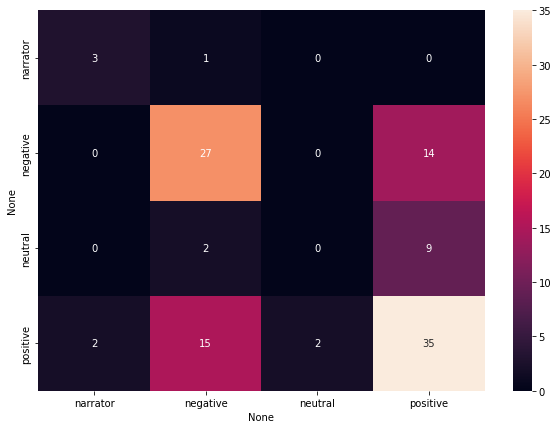

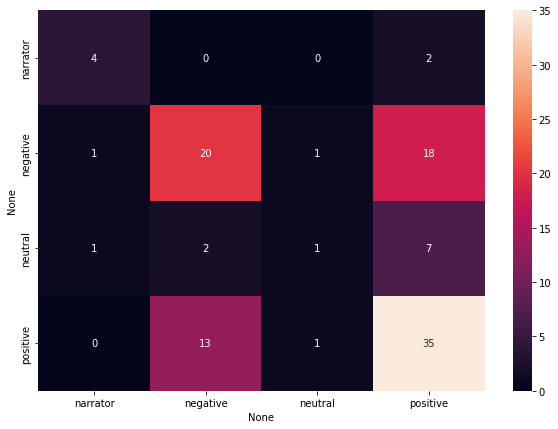

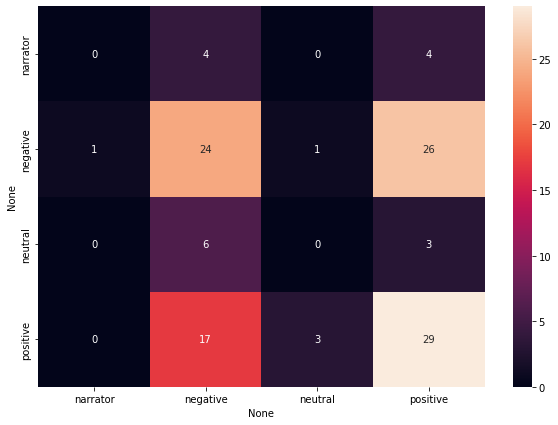

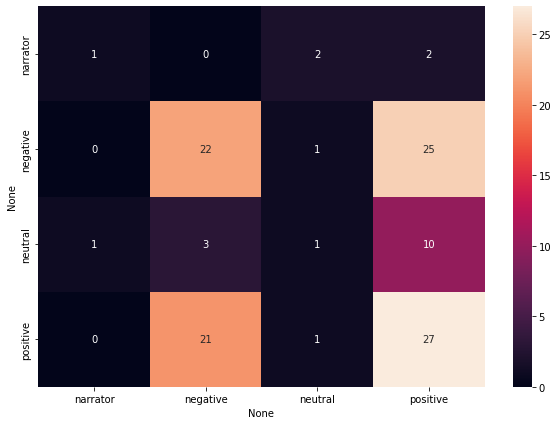

In [116]:
accuracy_list = []
recall_list = []
precision_list = []

accuracy_list_test = []
recall_list_test = []
precision_list_test = []

#Cross validation
for (train_fold, test_fold) in folds:
    #Train and test
    X_train, y_train =  train_values(X, y, train_fold)
    X_test, y_test =  test_values(X, y, test_fold)
    
    text_knn = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', KNeighborsClassifier(n_neighbors=5)),
    ])
    
    text_knn.fit(X_train, y_train)
    predicted = text_knn.predict(X_test)
    #print("Categorias: ", ohe.categories_)
    #print("test: ", y_test)
    #print("predito: ", predicted)
    
    cm_test = confusion_matrix_extra_column(list(y_test), list(predicted))
    cm_copy = square_matrix(cm_test)
    plot_confusion_matrix(cm_copy, ohe.categories_)
    print(cm_test)
    
    acc_macro = accuracy(cm_test)
    prec_macro = macro_precision(cm_test)
    rev_macro = macro_recall(cm_test)
    
    accuracy_list_test.append(acc_macro)
    recall_list_test.append(rev_macro)
    precision_list_test.append(prec_macro)
    
    acc = accuracy_score(y_test, predicted, normalize=True)
    recall = recall_score(y_test, predicted, average='macro') * 100
    precision = precision_score(y_test, predicted, average='macro') * 100
    
    accuracy_list.append(acc)
    recall_list.append(recall)
    precision_list.append(precision)

knn_metrics = {}
knn_metrics_test = {}
print()
for i in range(len(accuracy_list)):
    print("Sklearn acc: ", accuracy_list[i], " prec: " , precision_list[i]," recall: ", recall_list[i])
    print("Nosso acc: ", accuracy_list_test[i], " prec: " , precision_list_test[i]," recall: ", recall_list_test[i], "\n")

knn_metrics["accuracy"] = np.average(accuracy_list)
knn_metrics["recall"] = np.average(recall_list)
knn_metrics["precision"] = np.average(precision_list)

knn_metrics_test["accuracy"] = np.average(accuracy_list_test)
knn_metrics_test["recall"] = np.average(recall_list_test)
knn_metrics_test["precision"] = np.average(precision_list_test)

print(knn_metrics)
print(knn_metrics_test)